# Metodos Probabilisticos

Metricas?

https://iq.opengenus.org/naive-bayes-on-tf-idf-vectorized-matrix/

Las librerias necesarias son las siguientes:

In [1]:
# Librerias
import pathlib
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw

# import seaborn as sns
# sns.set()

Primero se define el directorio en el que se encuentra la libreta para poder acceder a los archivos pertinentes, y se debe especificar el directorio donde se encuentran los libros:

In [2]:
working_dir = pathlib.Path().absolute()
train_dir = working_dir / "training-dataset/"
test_dir = working_dir / "test-dataset/"

Ahora hay que leer los libros, estos están guardados en la carpeta `training-dataset/` la cual a su vez contiene 3 carpetas que corresponden a 3 categorias de libros. Estas carpetas son `adventure-stories`, `historical-fiction` y `horror` donde cada carpeta tiene 5 libros.

In [3]:
# categories = ["adventure-stories", "historical-fiction", "horror"]

In [4]:
def get_categories_paths(files_dir):
    paths = []
    for item in files_dir.iterdir():
        if item.is_dir():
            paths.append(item)
    
    return paths

In [5]:
categories_paths = get_categories_paths(train_dir)
categories_paths

[PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/chemistry'),
 PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/poetry'),
 PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/fiction'),
 PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/biology'),
 PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/horror'),
 PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/music'),
 PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/politics')]

Aunque ya se tienen todas las categorias, las cuales son representadas por el nombre de sus directorios, es necesario hacer lo mismo para los libros dentro de cada categoria. Se define una funcion para poder hacer esto:

In [6]:
def get_categories(files_dir):
    categories_paths = get_categories_paths(files_dir)
    categories = dict()
    for path in categories_paths:
        category = path.as_posix().split("/")[-1]
        categories[category] = path
        
    return categories

In [7]:
categories = get_categories(train_dir)
categories

{'chemistry': PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/chemistry'),
 'poetry': PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/poetry'),
 'fiction': PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/fiction'),
 'biology': PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/biology'),
 'horror': PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/horror'),
 'music': PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/music'),
 'politics': PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/politics')}

In [8]:
categories["horror"]

PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/horror')

La siguiente función permite identificar todos los libros en una categoría:

In [9]:
def get_books_in_category(category_path):
    books_in_category = []
    for item in category_path.iterdir():
        if item.is_file():
            books_in_category.append(item)
            
    return books_in_category

In [10]:
books_in_horror = get_books_in_category(categories["horror"])
books_in_horror

[PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/horror/metamorphosis.txt'),
 PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/horror/the-dunchich-horror.txt'),
 PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/horror/the-legend-of-sleepy-hollow.txt'),
 PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/horror/the-mysteries-of-udolpho.txt'),
 PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/horror/dracula.txt'),
 PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/horror/the-call-of-cthulhu.txt'),
 PosixPath('/home/leo/Documents/mia/mia-activities/mia-2022-half2/mp/mp-proyecto/training-dataset/horror/scotish-ghost-stories.txt')]

Tambien se debe implementar una función que lea un libro, y esta función se usará para leer todos los libros en la categoría indicada:

In [11]:
def get_text_of_book(book):
    with open(book, "r", encoding="utf-8") as file:
        for string in file:
            book_text = file.read().replace("\n", "")
            
    return book_text

In [12]:
def get_all_texts_in_category(category):
    books_in_category = get_books_in_category(category)
    
    return list(map(get_text_of_book, books_in_category))

La siguiente función toma los libros en cada directorio como categoría y genera el set de entrenamiento:

In [13]:
def get_training_data(files_dir):
    categories = get_categories(files_dir)
    corpus = []
    labels = []
    for key in categories.keys():
        texts_in_category = get_all_texts_in_category(categories[key])
        texts_labels = [key] * len(texts_in_category)
        corpus += texts_in_category
        labels += texts_labels
        
    return corpus, labels

In [14]:
corpus_train, label_train = get_training_data(train_dir)

Lo siguiente es leer los libros dentro del directorio de `test-dataset/` ya que ahí se encuentran aquellos que se usarán para probar el modelo. Se puede usar la función `get_all_texts_in_category()` usando como argumento el `path` del directorio donde se encuentran los libros de prueba. Con los libros leídos se va a comparar el modelo, y ver cuantos y cuales son clasificados correctamente:Con los libros leídos se va a comparar el modelo, y ver cuantos y cuales son clasificados correctamente:

In [15]:
corpus_test, label_test = get_training_data(test_dir)

In [16]:
label_test

['chemistry',
 'chemistry',
 'poetry',
 'poetry',
 'fiction',
 'biology',
 'biology',
 'horror',
 'horror',
 'music',
 'politics',
 'politics']

Los libros del test pertenecen a las siguientes categorias:

In [17]:
# building term matrices
vectorizer = CountVectorizer(tokenizer=str.split, stop_words="english")
corpus_train_mat = vectorizer.fit_transform(corpus_train)
corpus_train_mat = corpus_train_mat.toarray()

/home/leo/miniconda3/envs/mp-project/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [18]:
corpus_test_mat = vectorizer.transform(corpus_test)
corpus_test_mat = corpus_test_mat.toarray()

In [19]:
# building Naive Bayes Classifier
def naive_bayes(train_set, train_label):
    model = MultinomialNB()
    model.fit(train_set, train_label)
    
    return model

In [20]:
nb_model = naive_bayes(corpus_train_mat, label_train) # train the classifier

In [21]:
# predict a label of the documents in the test set using the trained classifier
label_predicted = nb_model.predict(corpus_test_mat)
label_predicted

array(['chemistry', 'chemistry', 'poetry', 'poetry', 'fiction', 'biology',
       'chemistry', 'horror', 'horror', 'music', 'politics', 'horror'],
      dtype='<U9')

In [22]:
def comparisson(test_label, predicted_label):
    print("Real    \t | Predicted")
    print("---------------------------")
    for pair in zip(test_label, predicted_label):
        print(pair[0] + "   \t | " + pair[1])

In [23]:
comparisson(label_test, label_predicted)

Real    	 | Predicted
---------------------------
chemistry   	 | chemistry
chemistry   	 | chemistry
poetry   	 | poetry
poetry   	 | poetry
fiction   	 | fiction
biology   	 | biology
biology   	 | chemistry
horror   	 | horror
horror   	 | horror
music   	 | music
politics   	 | politics
politics   	 | horror


El porcentaje de libros bien clasificados, también referido como la precisión, es el siguiente:

In [24]:
accuracy = accuracy_score(label_test, label_predicted)
accuracy

0.8333333333333334

In [25]:
# visualize a heat map of confusion matrix to evaluate the quality of the output of the classifier 
def get_confusion_matrix(train_label, test_label, predicted_label):
    conf_mat = confusion_matrix(test_label, predicted_label)
    labels = sorted(set(train_label))

    plt.figure()
    plt.title("Matriz de confusión")
    plt.imshow(conf_mat, interpolation="nearest", cmap=plt.cm.PuBu)
    plt.xticks(np.arange(len(labels)), labels, rotation=45)
    plt.yticks(np.arange(len(labels)), labels)
    plt.xlabel("Categoría predicha")
    plt.ylabel("Categoría verdadera")
    plt.colorbar()
    plt.show()

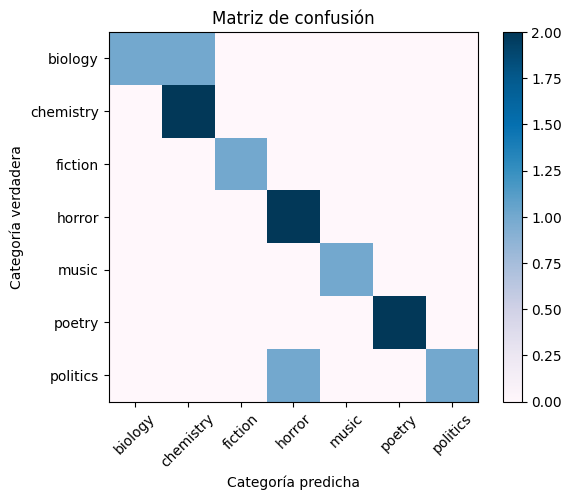

In [26]:
get_confusion_matrix(label_train, label_test, label_predicted)

In [27]:
print(classification_report(label_test, label_predicted, zero_division=0))

              precision    recall  f1-score   support

     biology       1.00      0.50      0.67         2
   chemistry       0.67      1.00      0.80         2
     fiction       1.00      1.00      1.00         1
      horror       0.67      1.00      0.80         2
       music       1.00      1.00      1.00         1
      poetry       1.00      1.00      1.00         2
    politics       1.00      0.50      0.67         2

    accuracy                           0.83        12
   macro avg       0.90      0.86      0.85        12
weighted avg       0.89      0.83      0.82        12



% EMPTY